# Extrait le genre le plus populaire du DataSet Kaggle Sotify high_popularity_spotify_data

## Analyse de la qualité
- le dataset est propre: pas de doublons, pas de valeurs manquante gênante

In [15]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

notebook_dir = Path().resolve()
project_root = notebook_dir.parent

sys.path.insert(0, project_root)
print(f"✅ Chemin ajouté : {project_root}")

✅ Chemin ajouté : /home/laurent/code/Laurent-Pa/epsi/AtelierIntegrationDonnee/Music-Analysis-ETL


In [16]:
#Extraction
df_high_popularity = pd.read_csv('../data/raw/high_popularity_spotify_data.csv')

In [17]:
display(df_high_popularity.head())
display(df_high_popularity.info())

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

None

In [18]:
print("AUDIT DATAFRAME high_popularity_spotify")

print("\n---Taux de valeurs manquantes (%)---")
missing_percentage = df_high_popularity.isnull().sum() / len(df_high_popularity) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


print("\n---Vérification des doublons---")
duplicated_rows = df_high_popularity[df_high_popularity.duplicated(keep=False)]
print(duplicated_rows.sort_values(by=df_high_popularity.columns[0]))

AUDIT DATAFRAME high_popularity_spotify

---Taux de valeurs manquantes (%)---
track_album_name    0.059312
dtype: float64

---Vérification des doublons---
Empty DataFrame
Columns: [energy, tempo, danceability, playlist_genre, loudness, liveness, valence, track_artist, time_signature, speechiness, track_popularity, track_href, uri, track_album_name, playlist_name, analysis_url, track_id, track_name, track_album_release_date, instrumentalness, track_album_id, mode, key, duration_ms, acousticness, id, playlist_subgenre, type, playlist_id]
Index: []

[0 rows x 29 columns]


In [19]:
# Copie du dataframe pour ne pas modifier l'original
df_clean = df_high_popularity.copy()

# Supprimer les doublons
nb_doublons = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
print(f"🔄 {nb_doublons} doublons supprimés")

# Afficher les valeurs manquantes par colonne
print("\n📊 Valeurs manquantes par colonne :")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Supprimer les lignes avec des valeurs manquantes
nb_lignes_avant = len(df_clean)
df_clean = df_clean.dropna()
nb_lignes_supprimees = nb_lignes_avant - len(df_clean)
print(f"\n🗑️ {nb_lignes_supprimees} lignes avec valeurs manquantes supprimées")

print(f"\n✅ Dataset final : {df_clean.shape[0]} lignes, {df_clean.shape[1]} colonnes")

🔄 0 doublons supprimés

📊 Valeurs manquantes par colonne :
track_album_name    1
dtype: int64

🗑️ 1 lignes avec valeurs manquantes supprimées

✅ Dataset final : 1685 lignes, 29 colonnes


In [20]:
# Calculer la popularité totale par genre
popularity_by_genre = df_high_popularity.groupby('playlist_genre')['track_popularity'].sum()

# Trier par ordre décroissant
popularity_by_genre_sorted = popularity_by_genre.sort_values(ascending=False)

print("Popularité totale par genre :")
print(popularity_by_genre_sorted)

# Le genre le plus populaire
most_popular_genre = popularity_by_genre_sorted.idxmax()
print(f"\n🎵 Genre le plus populaire : {most_popular_genre}")

Popularité totale par genre :
playlist_genre
pop           28575
rock          17531
hip-hop       16835
latin         13853
electronic    10949
gaming         8043
ambient        4531
r&b            3808
arabic         3699
punk           3678
blues          3265
metal          2578
folk           2476
afrobeats      1441
brazilian      1018
k-pop           830
j-pop           788
classical       706
indian          635
korean          559
turkish         503
reggae          353
indie           294
world           287
country         211
soul            151
lofi            143
jazz             69
Name: track_popularity, dtype: int64

🎵 Genre le plus populaire : pop


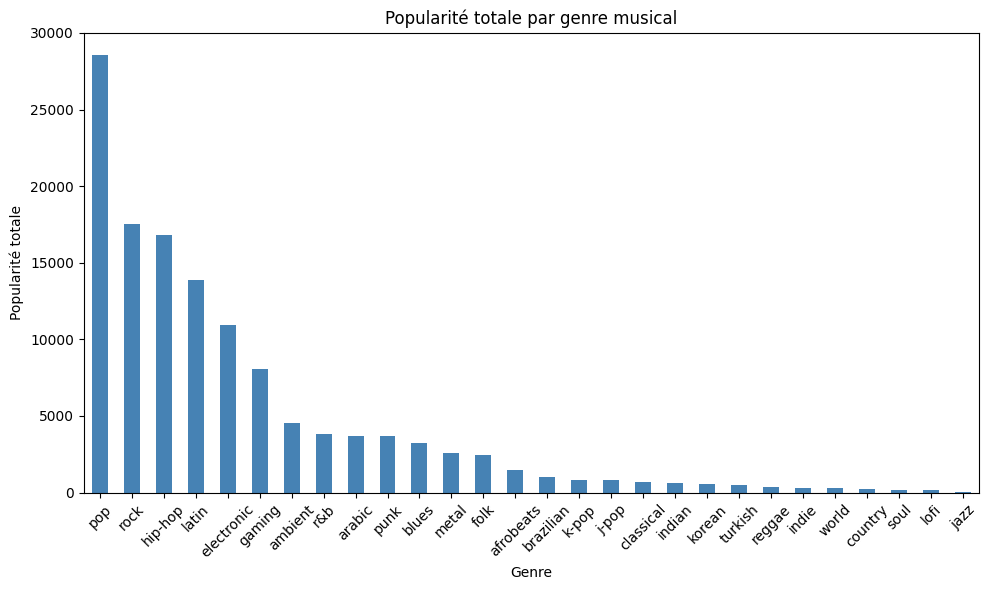

In [21]:
# Graphique en barres
plt.figure(figsize=(10, 6))
popularity_by_genre_sorted.plot(kind='bar', color='steelblue')
plt.title('Popularité totale par genre musical')
plt.xlabel('Genre')
plt.ylabel('Popularité totale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Calculer la popularité totale par genre
popularity_by_genre = df_high_popularity.groupby('playlist_genre')['track_popularity'].sum()

# Trier par ordre décroissant et prendre les 3 premiers
top_3_genres = popularity_by_genre.sort_values(ascending=False).head(3)

# Convertir en dictionnaire
top_3_dict = top_3_genres.to_dict()

print("Top 3 des genres les plus populaires :")
print(top_3_dict)

Top 3 des genres les plus populaires :
{'pop': 28575, 'rock': 17531, 'hip-hop': 16835}


## Calcul en prenant la popularité moyenne

In [23]:
# Calculer la popularité moyenne par genre
popularity_by_genre = df_high_popularity.groupby('playlist_genre')['track_popularity'].mean()

# Trier par ordre décroissant
popularity_by_genre_sorted = popularity_by_genre.sort_values(ascending=False)

print("Popularité moyenne par genre :")
print(popularity_by_genre_sorted)

# Le genre le plus populaire
most_popular_genre = popularity_by_genre_sorted.idxmax()
print(f"\n🎵 Genre le plus populaire : {most_popular_genre}")

Popularité moyenne par genre :
playlist_genre
gaming        80.430000
pop           80.042017
r&b           76.160000
soul          75.500000
k-pop         75.454545
latin         75.288043
folk          75.030303
rock          74.600000
ambient       74.278689
hip-hop       74.162996
arabic        73.980000
electronic    73.979730
metal         73.657143
punk          73.560000
indie         73.500000
brazilian     72.714286
blues         72.555556
afrobeats     72.050000
turkish       71.857143
world         71.750000
j-pop         71.636364
lofi          71.500000
classical     70.600000
reggae        70.600000
indian        70.555556
country       70.333333
korean        69.875000
jazz          69.000000
Name: track_popularity, dtype: float64

🎵 Genre le plus populaire : gaming


## tests de l'intégration du notebook avec l'ETL backend

In [24]:
from src.extractors.extractor_spotify import extract_spotify_data

df = extract_spotify_data('../data/raw/high_popularity_spotify_data.csv')

✅ Données chargées : 1686 lignes, 29 colonnes


In [25]:
from src.transformers.transformer_spotify import get_top_genres_by_popularity

# Utiliser la fonction avec le DataFrame chargé
top_3_dict = get_top_genres_by_popularity(df, top_n=3)
print(f"\n📊 Top 3 genres : {top_3_dict}")

🔄 0 doublons supprimés
🗑️ 1 lignes avec valeurs manquantes supprimées
✅ Dataset final : 1685 lignes, 29 colonnes

📊 Top 3 genres : {'pop': 28575, 'rock': 17531, 'hip-hop': 16835}
